<a href="https://colab.research.google.com/github/Pathakarnav22/ACM-SRM-Society-Chatting-Platform/blob/main/Handling_Imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

rcParams['figure.figsize'] = 14,8
RANDOM_SPEED = 42
LABELS = ["Normal","Fraud"]

In [3]:
data = pd.read_csv('creditcard.csv',sep=',')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [6]:
#create independent and dependent feature
columns = data.columns.tolist()
#filter columns to remove data we do not want
columns = [c for c in columns if c not in['Class']]
#store the variable that we are predicting
target = 'Class'
#Define the random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliners = state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))
#Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(9965, 30)
(9965,)


**Exploratory DataAnalysis**

In [7]:
data.isnull().values.any()

np.True_

/tmp/ipython-input-1802984059.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'],sort = True)


Text(0, 0.5, 'Frequency')

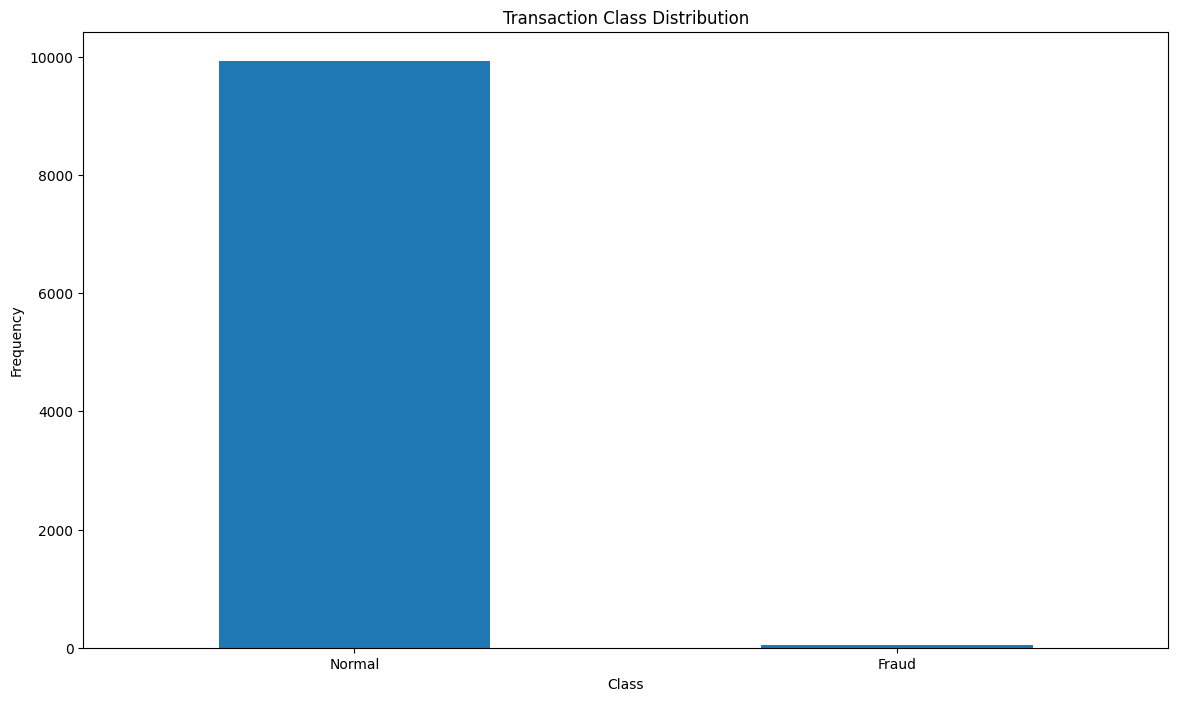

In [8]:
count_classes = pd.value_counts(data['Class'],sort = True)
count_classes.plot(kind = 'bar',rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [9]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [10]:
print(fraud.shape,normal.shape)

(38, 31) (9926, 31)


In [11]:
from imblearn.under_sampling import NearMiss


In [20]:
nm = NearMiss()
X_res,Y_res = nm.fit_resample(X,Y)

In [19]:
print("Number of missing values in Y:", Y.isnull().sum())
# Drop rows with missing values in Y from both X and Y
X = X[Y.notnull()]
Y = Y.dropna()
print("Shape of X after dropping NaNs:", X.shape)
print("Shape of Y after dropping NaNs:", Y.shape)

Number of missing values in Y: 1
Shape of X after dropping NaNs: (9964, 30)
Shape of Y after dropping NaNs: (9964,)


In [22]:
X_res.shape,Y_res.shape

((76, 30), (76,))

In [24]:
from collections import Counter
print('Original DataSet shape{}'.format(Counter(Y)))
print('Resampled DataSet shape{}'.format(Counter(Y_res)))

Original DataSet shapeCounter({0.0: 9926, 1.0: 38})
Resampled DataSet shapeCounter({0.0: 38, 1.0: 38})
